In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, LinearRegression
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

In [3]:
ames=pd.read_csv('/content/AmesHousing.csv')

In [4]:
X = ames.drop("SalePrice", axis=1)
y = ames["SalePrice"]

In [5]:
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

In [6]:
# Define a ColumnTransformer for preprocessing (scaling numeric and encoding categorical)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_features)
    ]
)

In [7]:
# Define Ridge Regression pipeline with λ = 1
ridge_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("ridge_regression", Ridge(alpha=1))
])

In [8]:

# Define Linear Regression pipeline
linear_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("linear_regression", LinearRegression())
])

In [10]:
# Cross-validation with RMSE as the metric
ridge_rmse = -cross_val_score(ridge_pipeline, X, y, scoring='neg_root_mean_squared_error', cv=5).mean()
linear_rmse = -cross_val_score(linear_pipeline, X, y, scoring='neg_root_mean_squared_error', cv=5).mean()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1242, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1064, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:

print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Linear Regression RMSE: {linear_rmse}")

# Fit both models on the entire dataset
ridge_pipeline.fit(X, y)
linear_pipeline.fit(X, y)

# Get coefficients from both models
ridge_coef = ridge_pipeline.named_steps["ridge_regression"].coef_
linear_coef = linear_pipeline.named_steps["linear_regression"].coef_

# Prepare the data for visualization with plotnine
coef_df = pd.DataFrame({
    'Index': range(len(ridge_coef)),
    'Ridge Coefficients': ridge_coef,
    'Linear Coefficients': linear_coef
}).melt(id_vars="Index", var_name="Model", value_name="Coefficient")

# Create the plot using plotnine
plot = (
    ggplot(coef_df, aes(x="Index", y="Coefficient", color="Model")) +
    geom_line() +
    labs(title="Comparison of Ridge and Linear Regression Coefficients",
         x="Coefficient Index", y="Coefficient Value") +
    theme_minimal()
)

print(plot)

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LinearRegression
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

Ridge Regression RMSE: 28205.024436463114
Linear Regression RMSE: 51189912078264.18
<ggplot: (640 x 480)>


In [13]:
X = ames.drop("SalePrice", axis=1)
y = ames["SalePrice"]

In [14]:

# Define numeric and categorical features for preprocessing
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),  # Impute missing values with mean for numerical
            ("scaler", StandardScaler())
        ]), numeric_features),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),  # Impute missing values with most frequent for categorical
            ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
        ]), categorical_features)
    ]
)

In [16]:
# Define Ridge Regression pipeline with λ = 1
ridge_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("ridge_regression", Ridge(alpha=1))
])

In [17]:
# Define Linear Regression pipeline
linear_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("linear_regression", LinearRegression())
])

In [18]:
# Cross-validation with RMSE as the metric
ridge_rmse = -cross_val_score(ridge_pipeline, X, y, scoring='neg_root_mean_squared_error', cv=5).mean()
linear_rmse = -cross_val_score(linear_pipeline, X, y, scoring='neg_root_mean_squared_error', cv=5).mean()

print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Linear Regression RMSE: {linear_rmse}")

Ridge Regression RMSE: 28205.024436463114
Linear Regression RMSE: 51189912078264.18


In [ ]:
# Fit both models on the entire dataset
ridge_pipeline.fit(X, y)
linear_pipeline.fit(X, y)

In [ ]:
# Get coefficients from both models
ridge_coef = ridge_pipeline.named_steps["ridge_regression"].coef_
linear_coef = linear_pipeline.named_steps["linear_regression"].coef_

In [19]:
# Prepare the data for visualization with plotnine
coef_df = pd.DataFrame({
    'Index': range(len(ridge_coef)),
    'Ridge Coefficients': ridge_coef,
    'Linear Coefficients': linear_coef
}).melt(id_vars="Index", var_name="Model", value_name="Coefficient")

In [20]:
# Create the plot using plotnine
plot = (
    ggplot(coef_df, aes(x="Index", y="Coefficient", color="Model")) +
    geom_line() +
    labs(title="Comparison of Ridge and Linear Regression Coefficients",
         x="Coefficient Index", y="Coefficient Value") +
    theme_minimal()
)

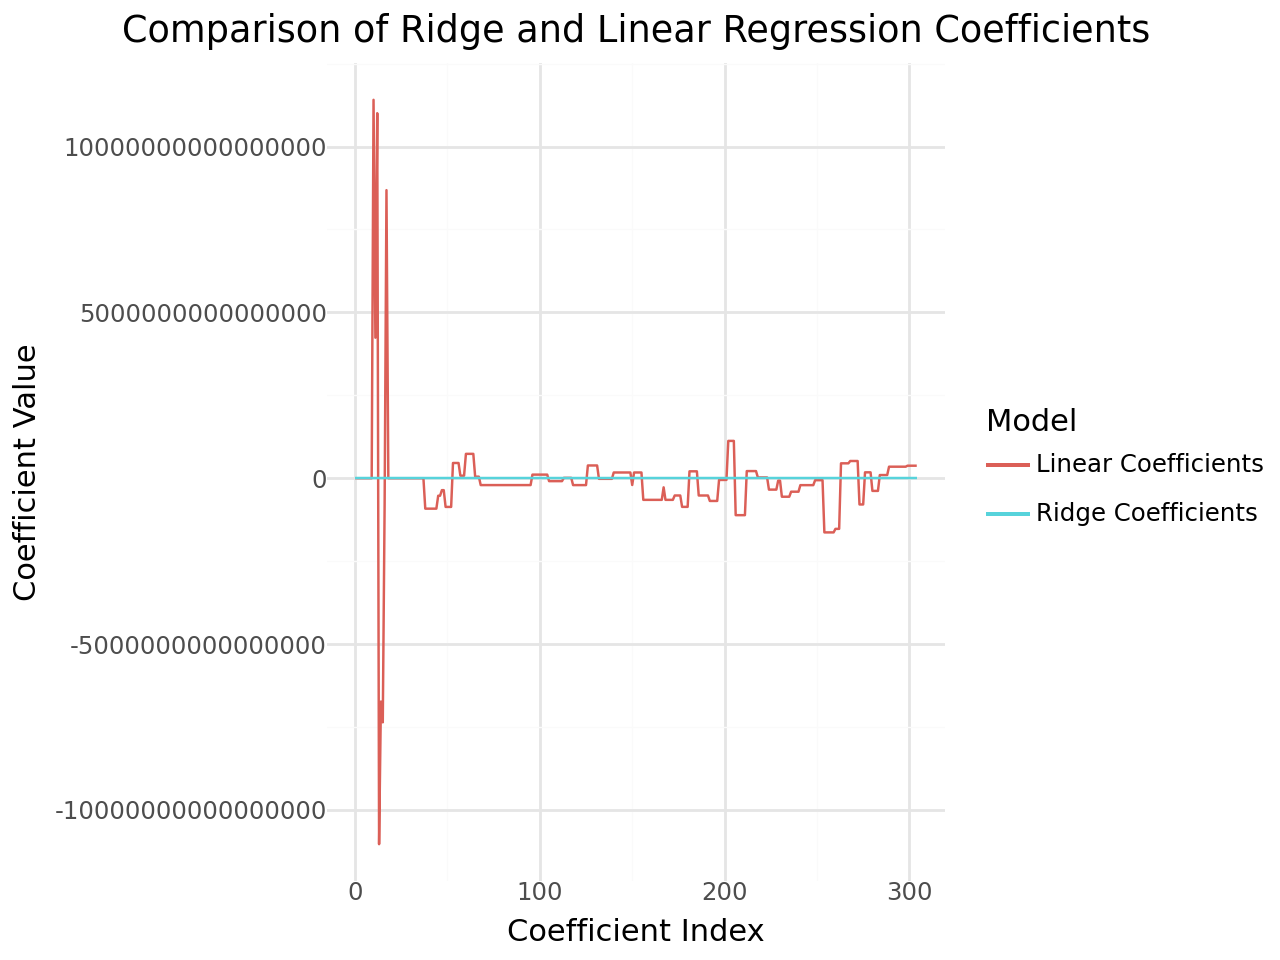

In [12]:
plot

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the Ridge Regression pipeline with preprocessing
ridge_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("ridge_regression", Ridge())
])

# Define the parameter grid for lambda (alpha) on a logarithmic scale
param_grid = {
    "ridge_regression__alpha": [0.001, 0.01, 0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge_pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Get the best lambda and corresponding RMSE
best_lambda = grid_search.best_params_["ridge_regression__alpha"]
best_rmse = -grid_search.best_score_  # Convert back to positive RMSE

print(f"Best Lambda (alpha): {best_lambda}")
print(f"Best Cross-Validated RMSE: {best_rmse}")

Best Lambda (alpha): 10
Best Cross-Validated RMSE: 28174.601820658085


Best Lasso Lambda (alpha): 10
Best Cross-Validated RMSE for Lasso: 28334.09784940139


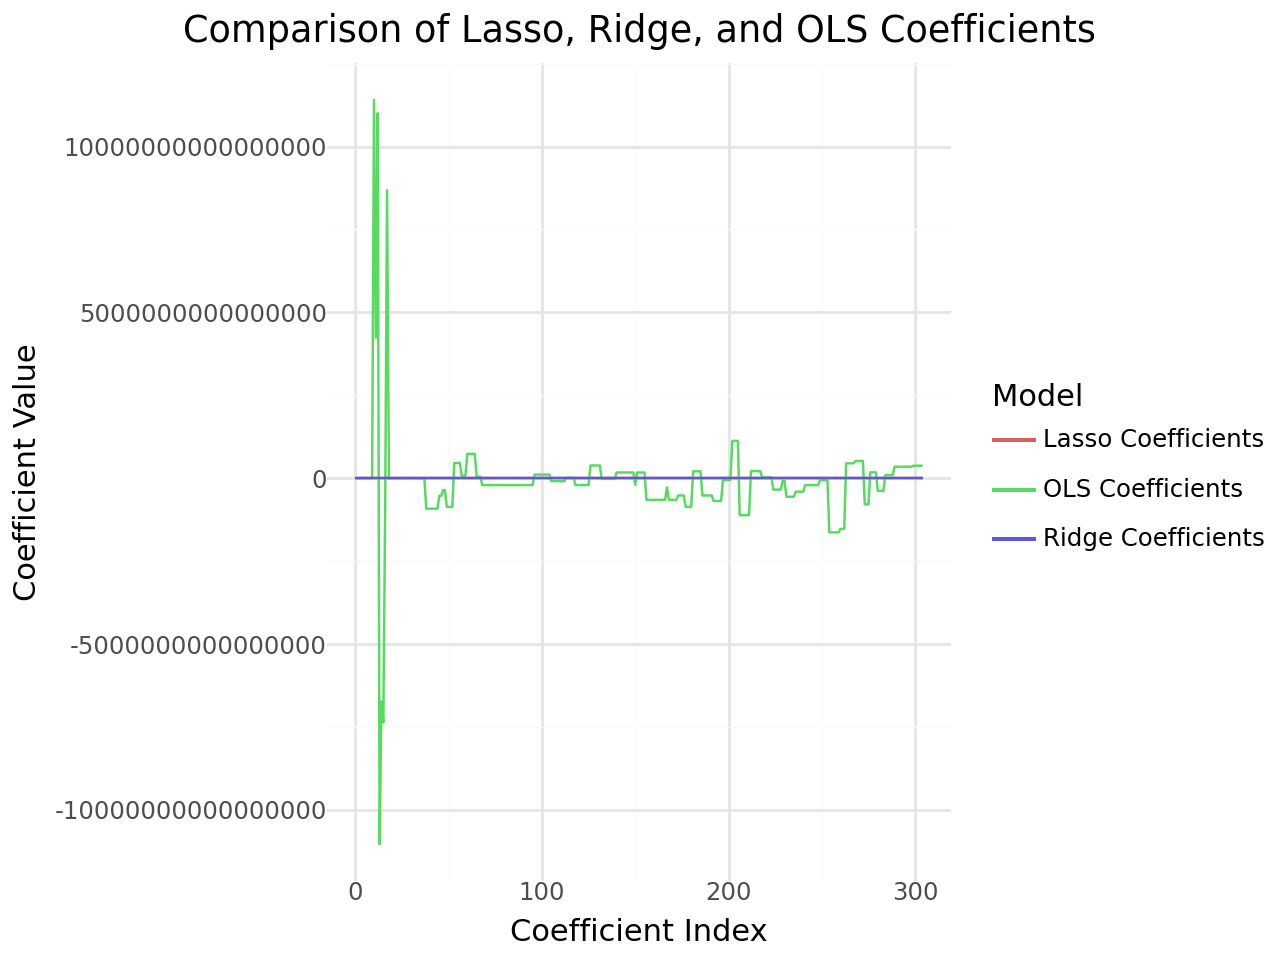

In [22]:
from sklearn.linear_model import Lasso

# Define the Lasso Regression pipeline with preprocessing
lasso_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("lasso_regression", Lasso(max_iter=10000))
])

# Define the parameter grid for lambda (alpha) on a logarithmic scale
param_grid = {
    "lasso_regression__alpha": [0.001, 0.01, 0.1, 1, 10]
}

# Perform grid search with cross-validation for Lasso
lasso_grid_search = GridSearchCV(lasso_pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_grid_search.fit(X, y)

# Get the best lambda and corresponding RMSE for Lasso
best_lasso_lambda = lasso_grid_search.best_params_["lasso_regression__alpha"]
best_lasso_rmse = -lasso_grid_search.best_score_

print(f"Best Lasso Lambda (alpha): {best_lasso_lambda}")
print(f"Best Cross-Validated RMSE for Lasso: {best_lasso_rmse}")

# Fit the best Lasso model, Ridge, and OLS on the full dataset
best_lasso_model = lasso_grid_search.best_estimator_
ridge_pipeline.set_params(ridge_regression__alpha=best_lambda).fit(X, y)  # Fit Ridge with best lambda
linear_pipeline.fit(X, y)  # Fit OLS (Linear Regression)

# Extract coefficients
lasso_coef = best_lasso_model.named_steps["lasso_regression"].coef_
ridge_coef = ridge_pipeline.named_steps["ridge_regression"].coef_
linear_coef = linear_pipeline.named_steps["linear_regression"].coef_

# Prepare data for comparison
coef_df = pd.DataFrame({
    'Index': range(len(lasso_coef)),
    'Lasso Coefficients': lasso_coef,
    'Ridge Coefficients': ridge_coef,
    'OLS Coefficients': linear_coef
}).melt(id_vars="Index", var_name="Model", value_name="Coefficient")

# Plot the coefficients using plotnine
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

plot = (
    ggplot(coef_df, aes(x="Index", y="Coefficient", color="Model")) +
    geom_line() +
    labs(title="Comparison of Lasso, Ridge, and OLS Coefficients",
         x="Coefficient Index", y="Coefficient Value") +
    theme_minimal()
)

plot

In [23]:
from sklearn.linear_model import ElasticNet

# Define the Elastic Net pipeline with preprocessing
elastic_net_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("elastic_net", ElasticNet(max_iter=10000))
])

# Define the parameter grid for alpha (lambda) and l1_ratio (mixing parameter) on a logarithmic scale
param_grid = {
    "elastic_net__alpha": [0.001, 0.01, 0.1, 1, 10],
    "elastic_net__l1_ratio": [0.1, 0.5, 0.9]  # l1_ratio: 0.1 for mostly Ridge, 0.9 for mostly Lasso
}

# Perform grid search with cross-validation for Elastic Net
elastic_net_grid_search = GridSearchCV(elastic_net_pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
elastic_net_grid_search.fit(X, y)

# Get the best alpha (lambda), l1_ratio, and corresponding RMSE for Elastic Net
best_elastic_net_alpha = elastic_net_grid_search.best_params_["elastic_net__alpha"]
best_elastic_net_l1_ratio = elastic_net_grid_search.best_params_["elastic_net__l1_ratio"]
best_elastic_net_rmse = -elastic_net_grid_search.best_score_

print(f"Best Elastic Net Alpha (lambda): {best_elastic_net_alpha}")
print(f"Best Elastic Net L1 Ratio (rho): {best_elastic_net_l1_ratio}")
print(f"Best Cross-Validated RMSE for Elastic Net: {best_elastic_net_rmse}")

# Fit the best Elastic Net model, Ridge, and OLS on the full dataset
best_elastic_net_model = elastic_net_grid_search.best_estimator_
ridge_pipeline.set_params(ridge_regression__alpha=best_lambda).fit(X, y)  # Fit Ridge with best lambda
linear_pipeline.fit(X, y)  # Fit OLS (Linear Regression)

# Extract coefficients
elastic_net_coef = best_elastic_net_model.named_steps["elastic_net"].coef_
ridge_coef = ridge_pipeline.named_steps["ridge_regression"].coef_
linear_coef = linear_pipeline.named_steps["linear_regression"].coef_

# Prepare data for comparison
coef_df = pd.DataFrame({
    'Index': range(len(elastic_net_coef)),
    'Elastic Net Coefficients': elastic_net_coef,
    'Ridge Coefficients': ridge_coef,
    'OLS Coefficients': linear_coef
}).melt(id_vars="Index", var_name="Model", value_name="Coefficient")

# Plot the coefficients using plotnine
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

plot = (
    ggplot(coef_df, aes(x="Index", y="Coefficient", color="Model")) +
    geom_line() +
    labs(title="Comparison of Elastic Net, Ridge, and OLS Coefficients",
         x="Coefficient Index", y="Coefficient Value") +
    theme_minimal()
)

Best Elastic Net Alpha (lambda): 0.01
Best Elastic Net L1 Ratio (rho): 0.9
Best Cross-Validated RMSE for Elastic Net: 28133.980909654714


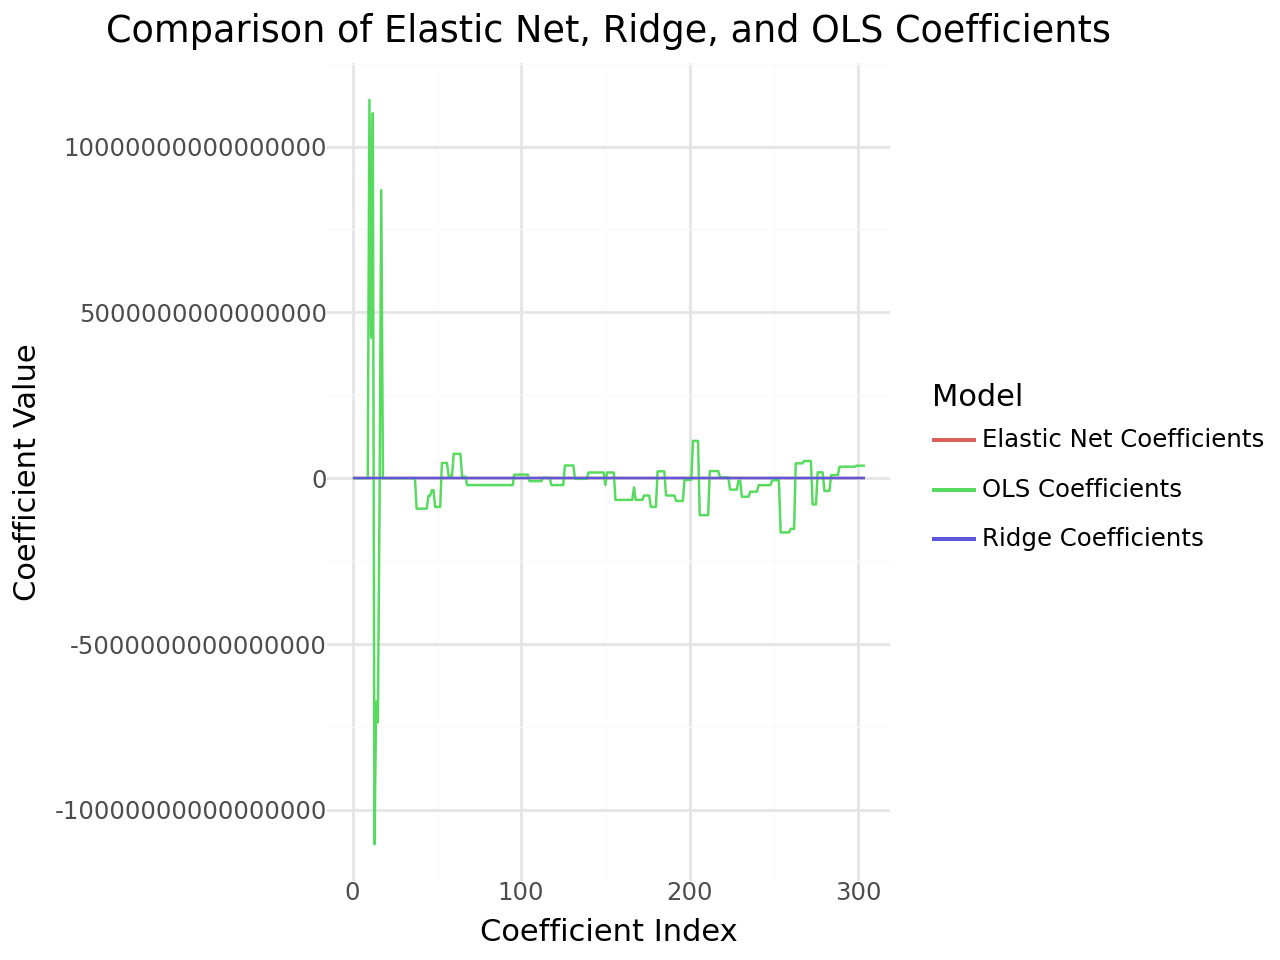

In [24]:
plot